In [1]:
# We have divided our project in three parts:
# PART1:SCRAPING THE LIVE DATA
# PART 2: FEATURE EXTRACTION & TRAINING PHASE 
# PART3: ANALYSIS ON LIVE DATA    

In [1]:
# imported all the required modules
import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy import OAuthHandler
import numpy as np
import pandas as pd
import spacy
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# PART1:SCRAPING THE LIVE DATA

In [2]:
access_token =  "1652625534151704576-BpkZitgvOYYVkHPI897TpshTKHYuxj"
access_token_secret = "yOVNPgAS2DfHqnIlKv8qP6lw84hwDfZFXKjyr0NSfF56W"
consumer_key = "HzkqDfV6TdmpyL7xkBujJJ3Lf"
consumer_secret ="WtTqpgp9Uv1OpNpeg3CtOfrKJ7NwMh0GelIXrz3ECPUkXFWjjE"

In [3]:
# # Accessing all the reuired keys for fetching the live data
# # All keys are setted in enviorement variable
# consumer_key = "TWITTER_CONSUMER_KEY"
# consumer_secret ="TWITTER_CONSUMER_SECRET"
# access_token =  "TWITTER_ACCESS_TOKEN"
# access_token_secret = "TWITTER_ACCESS_TOKEN_SECRET"

In [4]:
# created an API object using the authentication credentials stored in the auth object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
def scrape(hastag, date_since, numtweet,flag):

    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['UserID','Username',
                               'Description',
                               'Location',
                               'Following',
                               'Followers',
                               'Totaltweets',
                               'Retweetcount',
                               'Text'])

    # We are using .Cursor() to search
    # through twitter for the required tweets.
    # The number of tweets can be
    # restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets,hastag, lang="en",since_id=date_since,tweet_mode='extended').items(numtweet)

    # .Cursor() returns an iterable object. Each item in
    # the iterator has various attributes
    # that you can access to
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]

#     # Counter to maintain Tweet Count
#     i = 1

    # we will iterate over each tweet in the
    # list for extracting information about each tweet
    for tweet in list_tweets:
        UserID=tweet.user.id
        Username = tweet.user.screen_name
        Description = tweet.user.description
        Location = tweet.user.location
        Following = tweet.user.friends_count
        Followers = tweet.user.followers_count
        Totaltweets = tweet.user.statuses_count
        Retweetcount = tweet.retweet_count
#         hashtags = tweet.entities['hashtags']

        # Retweets can be distinguished by
        # a retweeted_status attribute,
        # in case it is an invalid reference,
        # except block will be executed
        try:
            Text = tweet.retweeted_status.full_text
        except AttributeError:
            Text = tweet.full_text
#         hashtext = list()
#         for j in range(0, len(hashtags)):
#             hashtext.append(hashtags[j]['text'])

        # Here we are appending all the
        # extracted information in the DataFrame
        ith_tweet = [UserID,Username, Description,
                     Location, Following,
                     Followers, Totaltweets,
                     Retweetcount, Text]
        db.loc[len(db)] = ith_tweet

        # Function call to print tweet data on screen
#         printtweetdata(i, ith_tweet)
#         i = i+1
    if flag==True:
        filename = 'scraped_tweets.csv'
    else:
        filename = 'scraped_tweets2.csv'
        
        

    # we will save our database as a CSV file.
    db.to_csv(filename)


In [6]:
hastag = input("Enter Twitter HashTag to search for: ")
print("Enter Date since The Tweets you want in yyyy-mm-dd")
date_since = input()
# number of tweets you want to extract in one run
numtweet = int(input("Enter how many tweets you want to scrape: "))
scrape(hastag, date_since, numtweet,True)
print('Scraping has completed!')

Enter Twitter HashTag to search for: Trumph
Enter Date since The Tweets you want in yyyy-mm-dd
2021-01-12
Enter how many tweets you want to scrape: 1000
Scraping has completed!


In [7]:
# reading the scraped csv file and showing top 10 rows of it.
df = pd.read_csv("scraped_tweets.csv")
df = df.drop(columns=df.columns[0])
df.head(10)

,UserID,Username,Description,Location,Following,Followers,Totaltweets,Retweetcount,Text
0,1646501911665713152,KevinKeith29695,FrEaKKeV,NaN,569,93,186,0,@okx Surf upper than Americans can Turf for @e...
1,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@Martez305 KiNG DONALD TRUMPH WAS ALWAYS A GRE...
2,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo THERE WAS NEVER A PRESIDENT LIKE K...
3,1518719705380536320,MrMino83,"I am someone who has lived a lot, lost it all,...","Indiana, USA",71,8,96,0,@Winglle20 @simonateba @realDonaldTrump @TomiL...
4,1959329359,onlywaytorock2,I have an Amazing Beautiful Daughter! I Love ...,"Dallas, TX",312,309,9144,0,@Beewest2000 @dreamtheaternet @JourneyOfficial...
5,1387927382,BDanielHz,Artist,NaN,643,65,2428,0,@Acyn She is so bad at this job interview. Her...
6,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo HOLY SPIRIT COME DOWN WITH HIS POW...
7,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo KING TRUMPH HAS BEEN BEST PRESIDEN...
8,1588159453018394625,FlyingScotMan2,NaN,NaN,23,3,228,0,@Jillie1949 @The_Trump_Train Worst comment on ...
9,1585799749617291266,mikealbritton8,retired,NaN,157,48,1388,0,@ChrisMurphyCT The only professional liars I k...


In [8]:
# use the re.sub() function to remove Twitter-specific syntax and URLs from the tweet
# then the resulting tweet is split into a list of words using whitespace
# After that the list of words is joined together with single whitespace character
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(https?:\/\/.*[\r\n]*)', ' ',tweet).split())

In [9]:
df.head(10)

,UserID,Username,Description,Location,Following,Followers,Totaltweets,Retweetcount,Text
0,1646501911665713152,KevinKeith29695,FrEaKKeV,NaN,569,93,186,0,@okx Surf upper than Americans can Turf for @e...
1,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@Martez305 KiNG DONALD TRUMPH WAS ALWAYS A GRE...
2,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo THERE WAS NEVER A PRESIDENT LIKE K...
3,1518719705380536320,MrMino83,"I am someone who has lived a lot, lost it all,...","Indiana, USA",71,8,96,0,@Winglle20 @simonateba @realDonaldTrump @TomiL...
4,1959329359,onlywaytorock2,I have an Amazing Beautiful Daughter! I Love ...,"Dallas, TX",312,309,9144,0,@Beewest2000 @dreamtheaternet @JourneyOfficial...
5,1387927382,BDanielHz,Artist,NaN,643,65,2428,0,@Acyn She is so bad at this job interview. Her...
6,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo HOLY SPIRIT COME DOWN WITH HIS POW...
7,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo KING TRUMPH HAS BEEN BEST PRESIDEN...
8,1588159453018394625,FlyingScotMan2,NaN,NaN,23,3,228,0,@Jillie1949 @The_Trump_Train Worst comment on ...
9,1585799749617291266,mikealbritton8,retired,NaN,157,48,1388,0,@ChrisMurphyCT The only professional liars I k...


In [10]:
nlp = spacy.load('en_core_web_sm')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet):
#     doc = nlp(tweet)
#     entities = [entity.label_ for entity in doc.ents]

    # Using TextBlob for basic sentiment analysis
    tb_analysis = TextBlob(tweet)
    tb_polarity = tb_analysis.sentiment.polarity

    # Using VADER for more accurate sentiment analysis
    sid_polarity = sid.polarity_scores(tweet)['compound']

    # Giving more weighted to sid_polarity
    tb_weight = 0.3
    sid_weight = 0.7
    polarity = (tb_weight * tb_polarity) + (sid_weight * sid_polarity)

    # Mapping the polarity score to a sentiment score
    if (polarity >= 0.4):
    #strongly positive tweet
        return 6
    elif (polarity >= 0.2):
    # positive tweet
        return 5
    elif (polarity >= 0):
    # weakly positive tweet
        return 4
    elif (polarity >= -0.2):
    # negative tweet
        return 3
    elif (polarity >= -0.4):
     # weakly negative tweet
        return 2
    else:
        return 1 if polarity != 0 else 0 # zero for neutral tweet and 1 for strongly negative tweet


In [11]:
# creating a new coulumn in the data frame as 'clean_tweet' and calling the function clean_tweet for each tweet text
df['clean_tweet'] = df['Text'].apply(lambda x: clean_tweet(x))
# Here we are genating the sentiments on the cleaned tweets using the analyze_sentiment function
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))

In [13]:
df.head(10)

,UserID,Username,Description,Location,Following,Followers,Totaltweets,Retweetcount,Text,clean_tweet,Sentiment
0,1646501911665713152,KevinKeith29695,FrEaKKeV,NaN,569,93,186,0,@okx Surf upper than Americans can Turf for @e...,Surf upper than Americans can Turf for etui IS...,5
1,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@Martez305 KiNG DONALD TRUMPH WAS ALWAYS A GRE...,KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDEN...,6
2,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo THERE WAS NEVER A PRESIDENT LIKE K...,THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH H...,1
3,1518719705380536320,MrMino83,"I am someone who has lived a lot, lost it all,...","Indiana, USA",71,8,96,0,@Winglle20 @simonateba @realDonaldTrump @TomiL...,When has trumph been loyal to anyone He s a na...,2
4,1959329359,onlywaytorock2,I have an Amazing Beautiful Daughter! I Love ...,"Dallas, TX",312,309,9144,0,@Beewest2000 @dreamtheaternet @JourneyOfficial...,Rock tour and squeeze Judis Priest in there an...,6
5,1387927382,BDanielHz,Artist,NaN,643,65,2428,0,@Acyn She is so bad at this job interview. Her...,She is so bad at this job interview Her outfit...,1
6,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo HOLY SPIRIT COME DOWN WITH HIS POW...,HOLY SPIRIT COME DOWN WITH HIS POWER FOR KING ...,6
7,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo KING TRUMPH HAS BEEN BEST PRESIDEN...,KING TRUMPH HAS BEEN BEST PRESIDENT OF USA amp...,6
8,1588159453018394625,FlyingScotMan2,NaN,NaN,23,3,228,0,@Jillie1949 @The_Trump_Train Worst comment on ...,Trump Train Worst comment on twitter Trumph re...,1
9,1585799749617291266,mikealbritton8,retired,NaN,157,48,1388,0,@ChrisMurphyCT The only professional liars I k...,The only professional liars I k ow of are demo...,2


In [14]:
# This is just to show an example
n = 8
print('Original tweet:\n'+ df['Text'][n])
print()
print('Clean tweet:\n'+df['clean_tweet'][n])
print()
print('Sentiment:\n',df['Sentiment'][n])

Original tweet:
@Jillie1949 @The_Trump_Train Worst comment on twitter.  

Trumph record stands alone..   awsome

That's what YOU DONT LIKE 😆

Clean tweet:
Trump Train Worst comment on twitter Trumph record stands alone awsome That s what YOU DONT LIKE

Sentiment:
 1


In [15]:
# Print unique values of 'Sentiment' column
print(df['Sentiment'].unique())
# Convert 'Sentiment' column to integer data type
df['Sentiment'] = df['Sentiment'].astype(int)
# Print unique integer values of 'Sentiment' column
print(df['Sentiment'].unique())
# Print count of each unique integer value in 'Sentiment' column
print(df['Sentiment'].value_counts())

[5 6 1 2 4 3]
[5 6 1 2 4 3]
4    76
6    28
2    21
1    17
5    14
3     6
Name: Sentiment, dtype: int64


In [16]:
# Taking only three coulumns of the date frame and renaming 'clean_tweet' as 'Tweets'
df = df[['UserID', 'clean_tweet', 'Sentiment']]
df = df.rename(columns={'clean_tweet': 'Tweets'})

In [17]:
df.head()

,UserID,Tweets,Sentiment
0,1646501911665713152,Surf upper than Americans can Turf for etui IS...,5
1,1242899751139450881,KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDEN...,6
2,1242899751139450881,THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH H...,1
3,1518719705380536320,When has trumph been loyal to anyone He s a na...,2
4,1959329359,Rock tour and squeeze Judis Priest in there an...,6


In [18]:
# Saving the new data frame
df.to_csv('Tweets.csv', index=False)

# PART 2: FEATURE EXTRACTION & TRAINING PHASE

In [19]:
#import modules
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover

#create Spark session
appName = "Sentiment Analysis Using PySpark"
spark = SparkSession \
    .builder \
    .appName(appName) \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [20]:
spark

In [21]:
#read csv file into dataFrame with automatically inferred schema
tweets_csv = spark.read.csv('Tweets.csv', inferSchema=True, header=True)
tweets_csv.show(truncate=50, n=15)

+-------------------+--------------------------------------------------+---------+
|             UserID|                                            Tweets|Sentiment|
+-------------------+--------------------------------------------------+---------+
|1646501911665713152|Surf upper than Americans can Turf for etui IS ...|        5|
|1242899751139450881|KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDENT...|        6|
|1242899751139450881|THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH HE...|        1|
|1518719705380536320|When has trumph been loyal to anyone He s a nar...|        2|
|         1959329359|Rock tour and squeeze Judis Priest in there and...|        6|
|         1387927382|She is so bad at this job interview Her outfit ...|        1|
|1242899751139450881|HOLY SPIRIT COME DOWN WITH HIS POWER FOR KING T...|        6|
|1242899751139450881|KING TRUMPH HAS BEEN BEST PRESIDENT OF USA amp ...|        6|
|1588159453018394625|Trump Train Worst comment on twitter Trumph rec...|        1|
|158

In [23]:
data = tweets_csv.select("Tweets", col("Sentiment").cast("Int").alias("label"))
data.show(truncate = 50,n=15)

+--------------------------------------------------+-----+
|                                            Tweets|label|
+--------------------------------------------------+-----+
|Surf upper than Americans can Turf for etui IS ...|    5|
|KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDENT...|    6|
|THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH HE...|    1|
|When has trumph been loyal to anyone He s a nar...|    2|
|Rock tour and squeeze Judis Priest in there and...|    6|
|She is so bad at this job interview Her outfit ...|    1|
|HOLY SPIRIT COME DOWN WITH HIS POWER FOR KING T...|    6|
|KING TRUMPH HAS BEEN BEST PRESIDENT OF USA amp ...|    6|
|Trump Train Worst comment on twitter Trumph rec...|    1|
|The only professional liars I k ow of are democ...|    2|
|Bad signs coming out you say Fn signs hanging o...|    2|
|d Are you kidding Trumph because of his despica...|    6|
|Let s be honest every day trumph is a loser and...|    4|
|     amitbehere your father is from gujrat amazing|    

In [25]:
#divide data, 70% for training, 30% for testing
dividedData = data.randomSplit([0.7, 0.3]) 
trainingData = dividedData[0] #index 0 = data training
testingData = dividedData[1] #index 1 = data testing
train_rows = trainingData.count()
test_rows = testingData.count()
print ("Training data rows:", train_rows, "; Testing data rows:", test_rows)

Training data rows: 107 ; Testing data rows: 55


In [26]:
#Tokenize the 'Tweets' column of the 'trainingData' DataFrame using a Tokenizer object and output a new column called 'SentimentWords'
tokenizer = Tokenizer(inputCol="Tweets", outputCol="SentimentWords")
tokenizedTrain = tokenizer.transform(trainingData)
# Display five rows of the resulting DataFrame.
tokenizedTrain.show(truncate=50, n=5)

+--------------------------------------------------+-----+--------------------------------------------------+
|                                            Tweets|label|                                    SentimentWords|
+--------------------------------------------------+-----+--------------------------------------------------+
|                                     Arriba trumph|    4|                                  [arriba, trumph]|
|As a vet i can tell u trumpfDUMB numbnuts th US...|    6|[as, a, vet, i, can, tell, u, trumpfdumb, numbn...|
|Best what In your lifetime Spoken like a true T...|    6|[best, what, in, your, lifetime, spoken, like, ...|
|Bill who F B I on the the Trumph espionage case...|    4|[bill, who, f, b, i, on, the, the, trumph, espi...|
|But the wall What about the wall The trumph wal...|    4|[but, the, wall, what, about, the, wall, the, t...|
+--------------------------------------------------+-----+--------------------------------------------------+
only showi

In [27]:
# Removing stop words from tokenized tweets and generating MeaningfulWords
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(), 
                       outputCol="MeaningfulWords")
SwRemovedTrain = swr.transform(tokenizedTrain)
SwRemovedTrain.show(truncate=25, n=25)

+-------------------------+-----+-------------------------+-------------------------+
|                   Tweets|label|           SentimentWords|          MeaningfulWords|
+-------------------------+-----+-------------------------+-------------------------+
|            Arriba trumph|    4|         [arriba, trumph]|         [arriba, trumph]|
|As a vet i can tell u ...|    6|[as, a, vet, i, can, t...|[vet, tell, u, trumpfd...|
|Best what In your life...|    6|[best, what, in, your,...|[best, lifetime, spoke...|
|Bill who F B I on the ...|    4|[bill, who, f, b, i, o...|[bill, f, b, trumph, e...|
|But the wall What abou...|    4|[but, the, wall, what,...|[wall, wall, trumph, w...|
|  Citizen Trumph lost bro|    2|[citizen, trumph, lost...|[citizen, trumph, lost...|
|CreatingWealth What we...|    4|[creatingwealth, what,...|[creatingwealth, keepi...|
|        Deep state Trumph|    4|    [deep, state, trumph]|    [deep, state, trumph]|
|Don t forget imran kha...|    3|[don, t, forget, imra

In [28]:
# Creating numeric features from the meaningful words using HashingTF
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features")
numericTrainData = hashTF.transform(SwRemovedTrain).select(
    'label', 'MeaningfulWords', 'features')
numericTrainData.show(truncate=50, n=15)

+-----+--------------------------------------------------+--------------------------------------------------+
|label|                                   MeaningfulWords|                                          features|
+-----+--------------------------------------------------+--------------------------------------------------+
|    4|                                  [arriba, trumph]|                 (262144,[11094,248081],[1.0,1.0])|
|    6|[vet, tell, u, trumpfdumb, numbnuts, th, usa, s...|(262144,[10345,11094,14041,20596,34209,51783,52...|
|    6|[best, lifetime, spoken, like, true, trumph, la...|(262144,[2701,11094,17827,50265,146930,153636,1...|
|    4|       [bill, f, b, trumph, espionage, case, bill]|(262144,[11094,58839,148981,192310,211901,22815...|
|    4|          [wall, wall, trumph, wall, isn, working]|(262144,[11094,38308,71450,217680],[1.0,3.0,1.0...|
|    2|                      [citizen, trumph, lost, bro]|(262144,[11094,19153,124168,186264],[1.0,1.0,1....|
|    4|[cr

In [29]:
# Training a logistic regression model on the numeric features
lr = LogisticRegression(labelCol="label", featuresCol="features", 
                        maxIter=10, regParam=0.01)
model = lr.fit(numericTrainData)
print ("Training is done!")

Training is done!


In [30]:
# Tokenizing, removing stop words, and creating numeric features from the test data 
# using the same tokenizer, stop words remover, and hashing TF models as used for the training data
tokenizedTest = tokenizer.transform(testingData)
SwRemovedTest = swr.transform(tokenizedTest)
numericTest = hashTF.transform(SwRemovedTest).select(
    'Label', 'MeaningfulWords', 'features')
numericTest.show(truncate=25, n=5)

+-----+-------------------------+-------------------------+
|Label|          MeaningfulWords|                 features|
+-----+-------------------------+-------------------------+
|    2|[bad, signs, coming, s...|(262144,[11094,11125,1...|
|    2|[political, vs, trumph...|(262144,[2120,11094,12...|
|    2|[current, real, usa, p...|(262144,[2638,11094,20...|
|    2|[gee, paul, didn, prob...|(262144,[11094,67950,1...|
|    4|[trumph, select, akash...|(262144,[10165,11094,3...|
+-----+-------------------------+-------------------------+
only showing top 5 rows



In [31]:
# predictions using the trained model on the test data 
prediction = model.transform(numericTest)
predictionFinal = prediction.select(
    "MeaningfulWords", "prediction", "Label")
predictionFinal.show(n=4, truncate = 25)
# calculating the accuracy of the model's predictions
correctPrediction = predictionFinal.filter(
    predictionFinal['prediction'] == predictionFinal['Label']).count()
totalData = predictionFinal.count()
print("correct prediction:", correctPrediction, ", total data:", totalData, 
      ", accuracy:", correctPrediction/totalData)

+-------------------------+----------+-----+
|          MeaningfulWords|prediction|Label|
+-------------------------+----------+-----+
|[bad, signs, coming, s...|       4.0|    2|
|[political, vs, trumph...|       4.0|    2|
|[current, real, usa, p...|       6.0|    2|
|[gee, paul, didn, prob...|       2.0|    2|
+-------------------------+----------+-----+
only showing top 4 rows

correct prediction: 29 , total data: 55 , accuracy: 0.5272727272727272


# PART3: ANALYSIS ON LIVE DATA

In [32]:
# print("Working on #"+words+" hastag!\n")
numtweet = int(input("Enter the number of tweets to Analysis the Sentiment on #"+hastag+" : "))
date_since=input("Enter Date since The Tweets you want in yyyy-mm-dd : ")
# date_since = input()
scrape(hastag, date_since, numtweet,False)
print('Scraping has completed!')

Enter the number of tweets to Analysis the Sentiment on #Trumph : 200
Enter Date since The Tweets you want in yyyy-mm-dd : 
Scraping has completed!


In [33]:
df_new = pd.read_csv("scraped_tweets2.csv")
df_new = df_new.drop(columns=df_new.columns[0])
df_new.head(10)

,UserID,Username,Description,Location,Following,Followers,Totaltweets,Retweetcount,Text
0,1646501911665713152,KevinKeith29695,FrEaKKeV,NaN,569,93,186,0,@okx Surf upper than Americans can Turf for @e...
1,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@Martez305 KiNG DONALD TRUMPH WAS ALWAYS A GRE...
2,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo THERE WAS NEVER A PRESIDENT LIKE K...
3,1518719705380536320,MrMino83,"I am someone who has lived a lot, lost it all,...","Indiana, USA",71,8,96,0,@Winglle20 @simonateba @realDonaldTrump @TomiL...
4,1959329359,onlywaytorock2,I have an Amazing Beautiful Daughter! I Love ...,"Dallas, TX",312,309,9144,0,@Beewest2000 @dreamtheaternet @JourneyOfficial...
5,1387927382,BDanielHz,Artist,NaN,643,65,2428,0,@Acyn She is so bad at this job interview. Her...
6,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo HOLY SPIRIT COME DOWN WITH HIS POW...
7,1242899751139450881,LUISARNOLDOLAR3,HAY QUE DISFRUTAR DE LA VIDA.-,NaN,50,18,5417,0,@PapiTrumpo KING TRUMPH HAS BEEN BEST PRESIDEN...
8,1588159453018394625,FlyingScotMan2,NaN,NaN,23,3,228,0,@Jillie1949 @The_Trump_Train Worst comment on ...
9,1585799749617291266,mikealbritton8,retired,NaN,157,48,1388,0,@ChrisMurphyCT The only professional liars I k...


In [34]:
df_new['clean_tweet'] = df_new['Text'].apply(lambda x: clean_tweet(x))

In [35]:
n = 8
print('Original tweet:\n'+ df_new['Text'][n])
print()
print('Clean tweet:\n'+df_new['clean_tweet'][n])
print()

Original tweet:
@Jillie1949 @The_Trump_Train Worst comment on twitter.  

Trumph record stands alone..   awsome

That's what YOU DONT LIKE 😆

Clean tweet:
Trump Train Worst comment on twitter Trumph record stands alone awsome That s what YOU DONT LIKE



In [36]:
df_new = df_new[['clean_tweet']]
df_new = df_new.rename(columns={'clean_tweet': 'Tweets'})

In [37]:
df_new.head()

,Tweets
0,Surf upper than Americans can Turf for etui IS...
1,KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDEN...
2,THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH H...
3,When has trumph been loyal to anyone He s a na...
4,Rock tour and squeeze Judis Priest in there an...


In [38]:
df_new.to_csv('New_Tweets.csv', index=False)

In [39]:
#read csv file into dataFrame with automatically inferred schema
tweets_csv = spark.read.csv('New_Tweets.csv', inferSchema=True, header=True)
tweets_csv.show(truncate=50, n=15)

+--------------------------------------------------+
|                                            Tweets|
+--------------------------------------------------+
|Surf upper than Americans can Turf for etui IS ...|
|KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDENT...|
|THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH HE...|
|When has trumph been loyal to anyone He s a nar...|
|Rock tour and squeeze Judis Priest in there and...|
|She is so bad at this job interview Her outfit ...|
|HOLY SPIRIT COME DOWN WITH HIS POWER FOR KING T...|
|KING TRUMPH HAS BEEN BEST PRESIDENT OF USA amp ...|
|Trump Train Worst comment on twitter Trumph rec...|
|The only professional liars I k ow of are democ...|
|Bad signs coming out you say Fn signs hanging o...|
|d Are you kidding Trumph because of his despica...|
|Let s be honest every day trumph is a loser and...|
|     amitbehere your father is from gujrat amazing|
|Wokeness yet another ridiculous political ploy ...|
+---------------------------------------------

In [40]:
data = tweets_csv.select("Tweets")
data.show(truncate = 50,n=15)

+--------------------------------------------------+
|                                            Tweets|
+--------------------------------------------------+
|Surf upper than Americans can Turf for etui IS ...|
|KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDENT...|
|THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH HE...|
|When has trumph been loyal to anyone He s a nar...|
|Rock tour and squeeze Judis Priest in there and...|
|She is so bad at this job interview Her outfit ...|
|HOLY SPIRIT COME DOWN WITH HIS POWER FOR KING T...|
|KING TRUMPH HAS BEEN BEST PRESIDENT OF USA amp ...|
|Trump Train Worst comment on twitter Trumph rec...|
|The only professional liars I k ow of are democ...|
|Bad signs coming out you say Fn signs hanging o...|
|d Are you kidding Trumph because of his despica...|
|Let s be honest every day trumph is a loser and...|
|     amitbehere your father is from gujrat amazing|
|Wokeness yet another ridiculous political ploy ...|
+---------------------------------------------

In [41]:
tokenizer = Tokenizer(inputCol="Tweets", outputCol="Words")
tokenizedData = tokenizer.transform(data)
tokenizedData.show(truncate=50, n=5)

+--------------------------------------------------+--------------------------------------------------+
|                                            Tweets|                                             Words|
+--------------------------------------------------+--------------------------------------------------+
|Surf upper than Americans can Turf for etui IS ...|[surf, upper, than, americans, can, turf, for, ...|
|KiNG DONALD TRUMPH WAS ALWAYS A GREAT PRESIDENT...|[king, donald, trumph, was, always, a, great, p...|
|THERE WAS NEVER A PRESIDENT LIKE KING TRUMPH HE...|[there, was, never, a, president, like, king, t...|
|When has trumph been loyal to anyone He s a nar...|[when, has, trumph, been, loyal, to, anyone, he...|
|Rock tour and squeeze Judis Priest in there and...|[rock, tour, and, squeeze, judis, priest, in, t...|
+--------------------------------------------------+--------------------------------------------------+
only showing top 5 rows



In [42]:
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="MeaningfulWords")
SwRemovedData = swr.transform(tokenizedData)
SwRemovedData.show(truncate=25, n=15)

+-------------------------+-------------------------+-------------------------+
|                   Tweets|                    Words|          MeaningfulWords|
+-------------------------+-------------------------+-------------------------+
|Surf upper than Americ...|[surf, upper, than, am...|[surf, upper, american...|
|KiNG DONALD TRUMPH WAS...|[king, donald, trumph,...|[king, donald, trumph,...|
|THERE WAS NEVER A PRES...|[there, was, never, a,...|[never, president, lik...|
|When has trumph been l...|[when, has, trumph, be...|[trumph, loyal, anyone...|
|Rock tour and squeeze ...|[rock, tour, and, sque...|[rock, tour, squeeze, ...|
|She is so bad at this ...|[she, is, so, bad, at,...|[bad, job, interview, ...|
|HOLY SPIRIT COME DOWN ...|[holy, spirit, come, d...|[holy, spirit, come, p...|
|KING TRUMPH HAS BEEN B...|[king, trumph, has, be...|[king, trumph, best, p...|
|Trump Train Worst comm...|[trump, train, worst, ...|[trump, train, worst, ...|
|The only professional ...|[the, only, p

In [43]:
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features")
numericData = hashTF.transform(SwRemovedData).select('MeaningfulWords', 'features')
numericData.show(truncate=25, n=15)

+-------------------------+-------------------------+
|          MeaningfulWords|                 features|
+-------------------------+-------------------------+
|[surf, upper, american...|(262144,[5148,8679,110...|
|[king, donald, trumph,...|(262144,[11094,32392,3...|
|[never, president, lik...|(262144,[3653,11094,52...|
|[trumph, loyal, anyone...|(262144,[11094,21823,2...|
|[rock, tour, squeeze, ...|(262144,[4631,9886,110...|
|[bad, job, interview, ...|(262144,[2686,11094,27...|
|[holy, spirit, come, p...|(262144,[11094,17985,7...|
|[king, trumph, best, p...|(262144,[8798,11094,32...|
|[trump, train, worst, ...|(262144,[1512,11094,27...|
|[professional, liars, ...|(262144,[11094,68693,7...|
|[bad, signs, coming, s...|(262144,[11094,11125,1...|
|[d, kidding, trumph, d...|(262144,[3657,11094,17...|
|[let, honest, every, d...|(262144,[11094,21285,3...|
|[amitbehere, father, g...|(262144,[24515,171368,...|
|[wokeness, yet, anothe...|(262144,[11094,31571,3...|
+-------------------------+-

In [44]:
prediction = model.transform(numericData)
predictionFinal = prediction.select("MeaningfulWords", "prediction")
predictionFinal.show(n=4, truncate = 25)

+-------------------------+----------+
|          MeaningfulWords|prediction|
+-------------------------+----------+
|[surf, upper, american...|       4.0|
|[king, donald, trumph,...|       6.0|
|[never, president, lik...|       1.0|
|[trumph, loyal, anyone...|       2.0|
+-------------------------+----------+
only showing top 4 rows



In [45]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

def plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
              'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
def Final_sentiment_analysis():
    rows = predictionFinal.collect()
    NoOfTerms = 0
    positive = 0
    wpositive = 0
    spositive = 0
    negative = 0
    wnegative = 0
    snegative = 0
    neutral = 0
    
    for row in rows:
        pred = row["prediction"]
        NoOfTerms+=1
        
        if pred==0.0: 
            snegative+=1
        elif pred==1.0:
            negative+=1
        elif pred==2.0:
            wnegative+=1
        elif pred==3.0:
            neutral+=1
        elif pred==4.0:
            wpositive+=1
        elif pred==5.0:
            positive+=1
        elif pred==6.0:
            spositive+=1
            
    # finding average of how people are reacting
    positive = percentage(positive, NoOfTerms)
    wpositive = percentage(wpositive, NoOfTerms)
    spositive = percentage(spositive, NoOfTerms)
    negative = percentage(negative, NoOfTerms)
    wnegative = percentage(wnegative, NoOfTerms)
    snegative = percentage(snegative, NoOfTerms)
    neutral = percentage(neutral, NoOfTerms)
    
    # printing out data
    print("How people are reacting on #" + hastag + " by analyzing " + str(NoOfTerms) + " tweets.")
    print()
    print("General Report: ")

    print()
    print("Detailed Report: ")
    print(str(positive) + "% people thought it was positive")
    print(str(wpositive) + "% people thought it was weakly positive")
    print(str(spositive) + "% people thought it was strongly positive")
    print(str(negative) + "% people thought it was negative")
    print(str(wnegative) + "% people thought it was weakly negative")
    print(str(snegative) + "% people thought it was strongly negative")
    print(str(neutral) + "% people thought it was neutral")

    plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, hastag, NoOfTerms)
        

How people are reacting on #Trumph by analyzing 162 tweets.

General Report: 

Detailed Report: 
3.70% people thought it was positive
59.88% people thought it was weakly positive
14.81% people thought it was strongly positive
8.02% people thought it was negative
11.11% people thought it was weakly negative
0.00% people thought it was strongly negative
2.47% people thought it was neutral


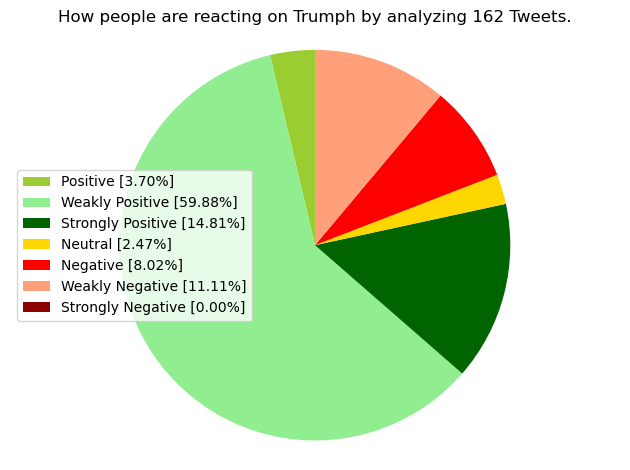

In [46]:
Final_sentiment_analysis()

In [47]:
spark.stop()